In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import fitGS
import fit1QSm
from PHMGS import *
from PHM1QSm import *
from H2_diat import *
print(fit1QSm.fit3d.__doc__)
print(fitGS.fit3d.__doc__)
# print(diatphm.__doc__)

e,der = fit3d(r12,r13,r23)

Wrapper for ``fit3d``.

Parameters
----------
r12 : input float
r13 : input float
r23 : input float

Returns
-------
e : float
der : rank-1 array('d') with bounds (3)

e,der = fit3d(r12,r13,r23)

Wrapper for ``fit3d``.

Parameters
----------
r12 : input float
r13 : input float
r23 : input float

Returns
-------
e : float
der : rank-1 array('d') with bounds (3)



/tmp/ipykernel_1549506/658065759.py:79: UserWarning: The following kwargs were not used by contour: 'ls'
  plt.contour(R12, R23, E, levels=levels_cnt, colors='black', linewidths=0.5, ls=":",alpha=0.5)


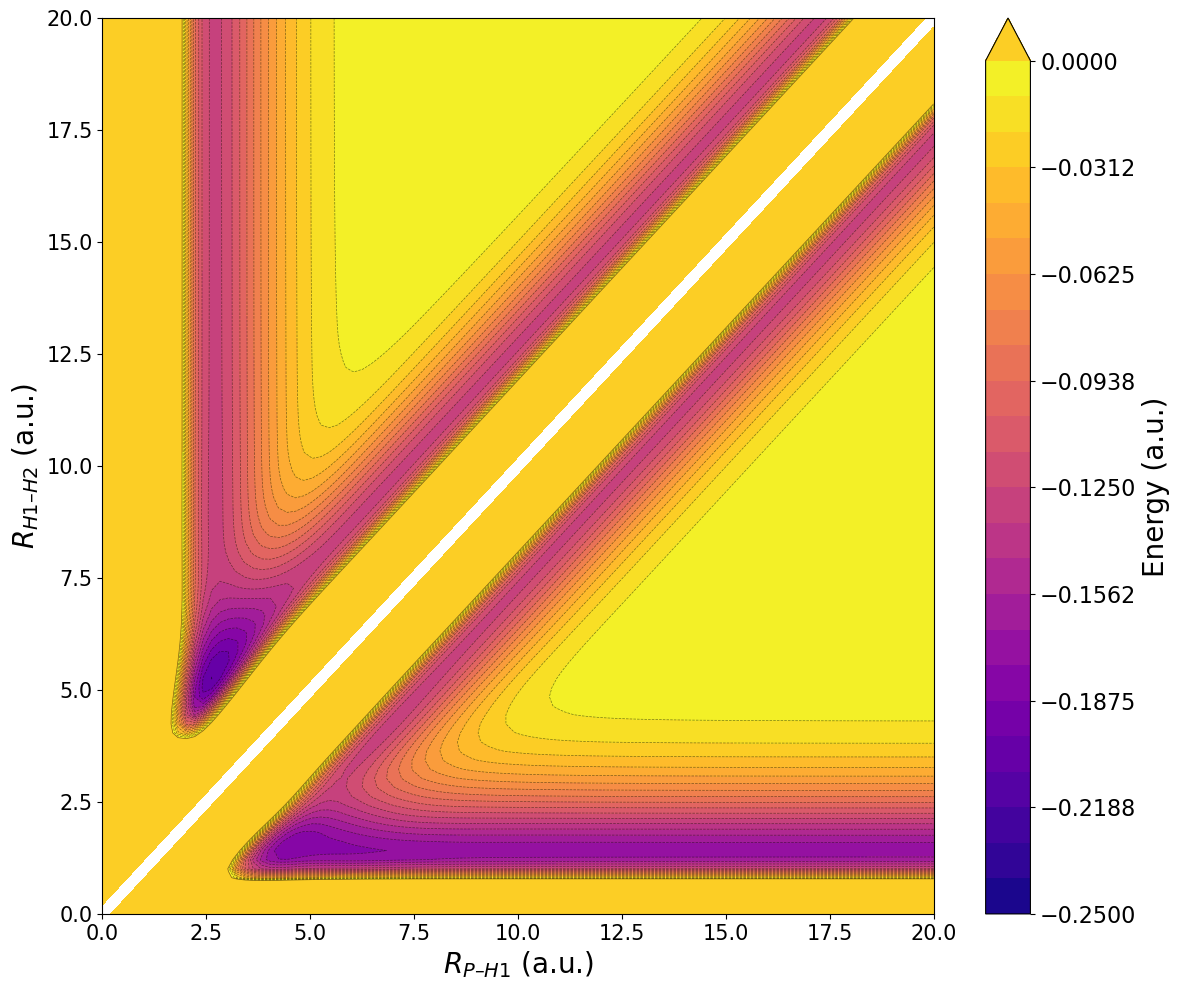

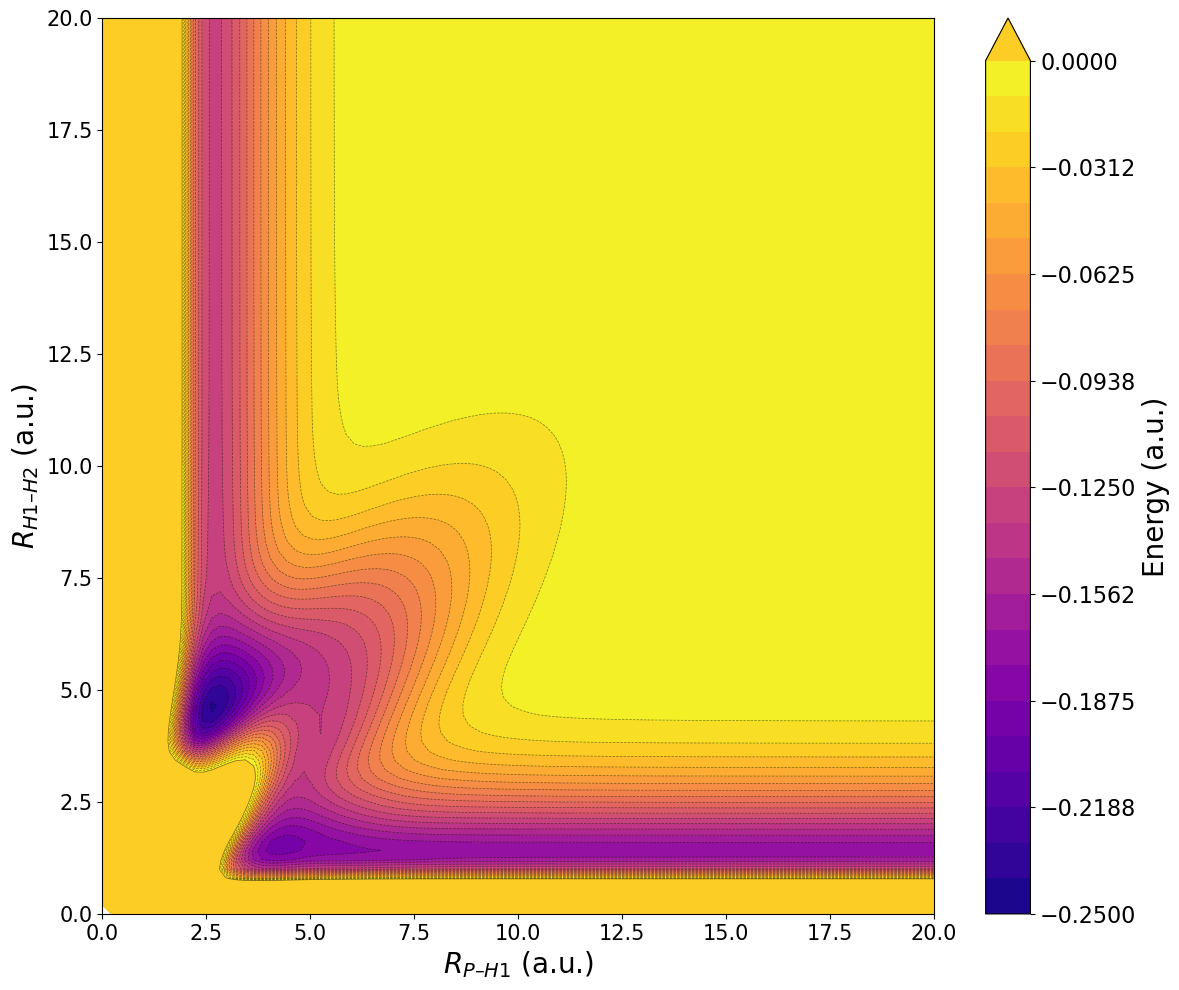

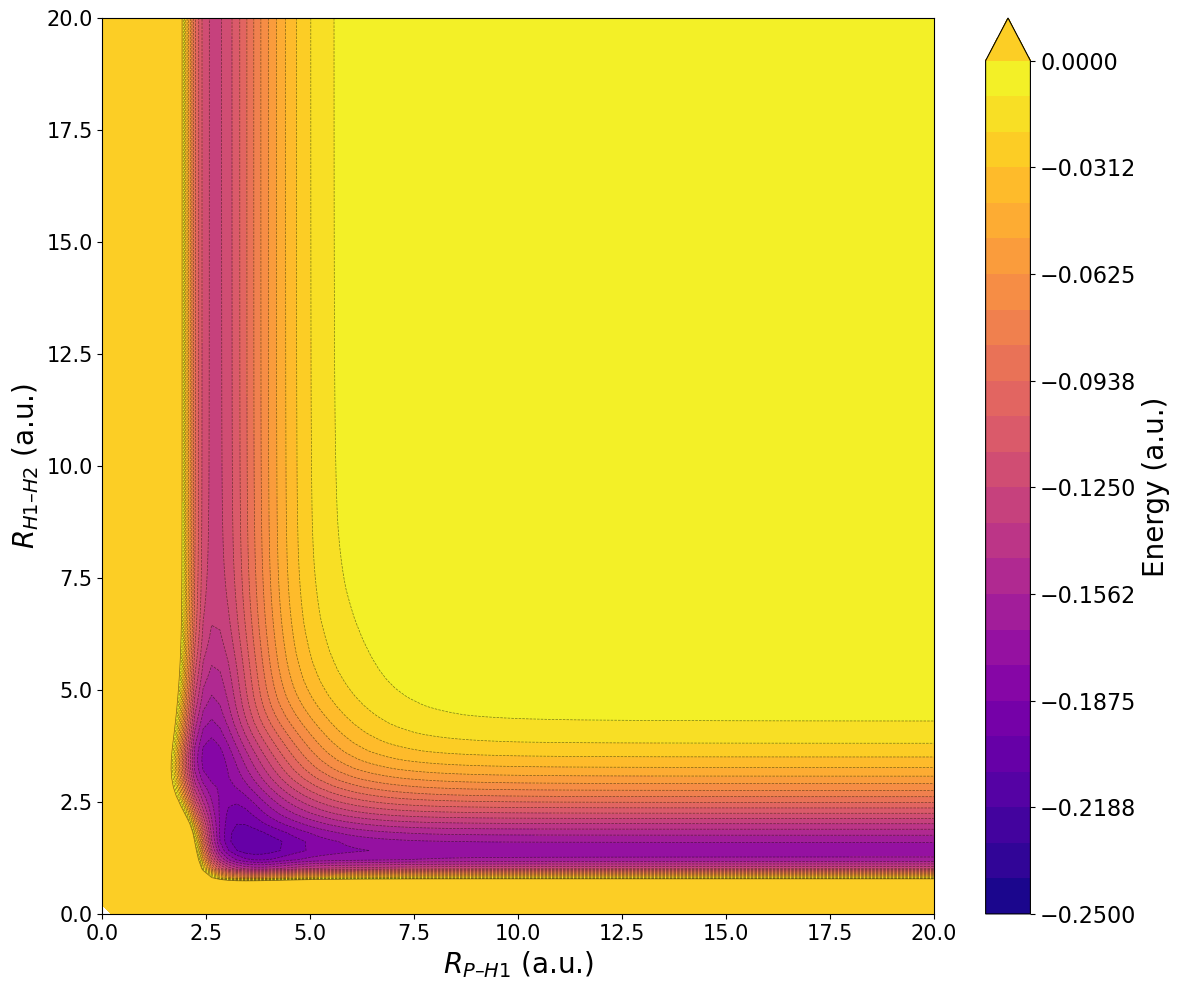

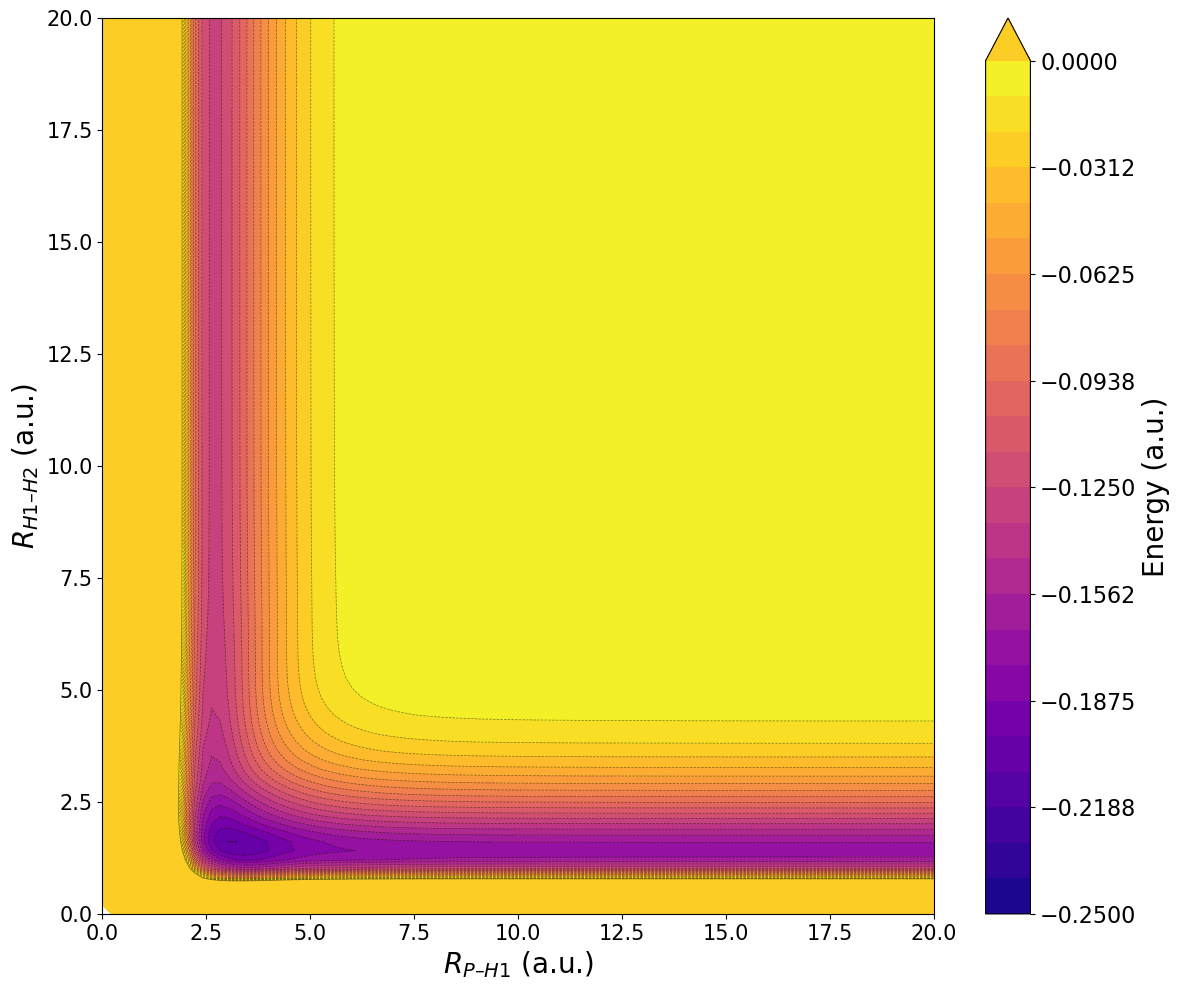

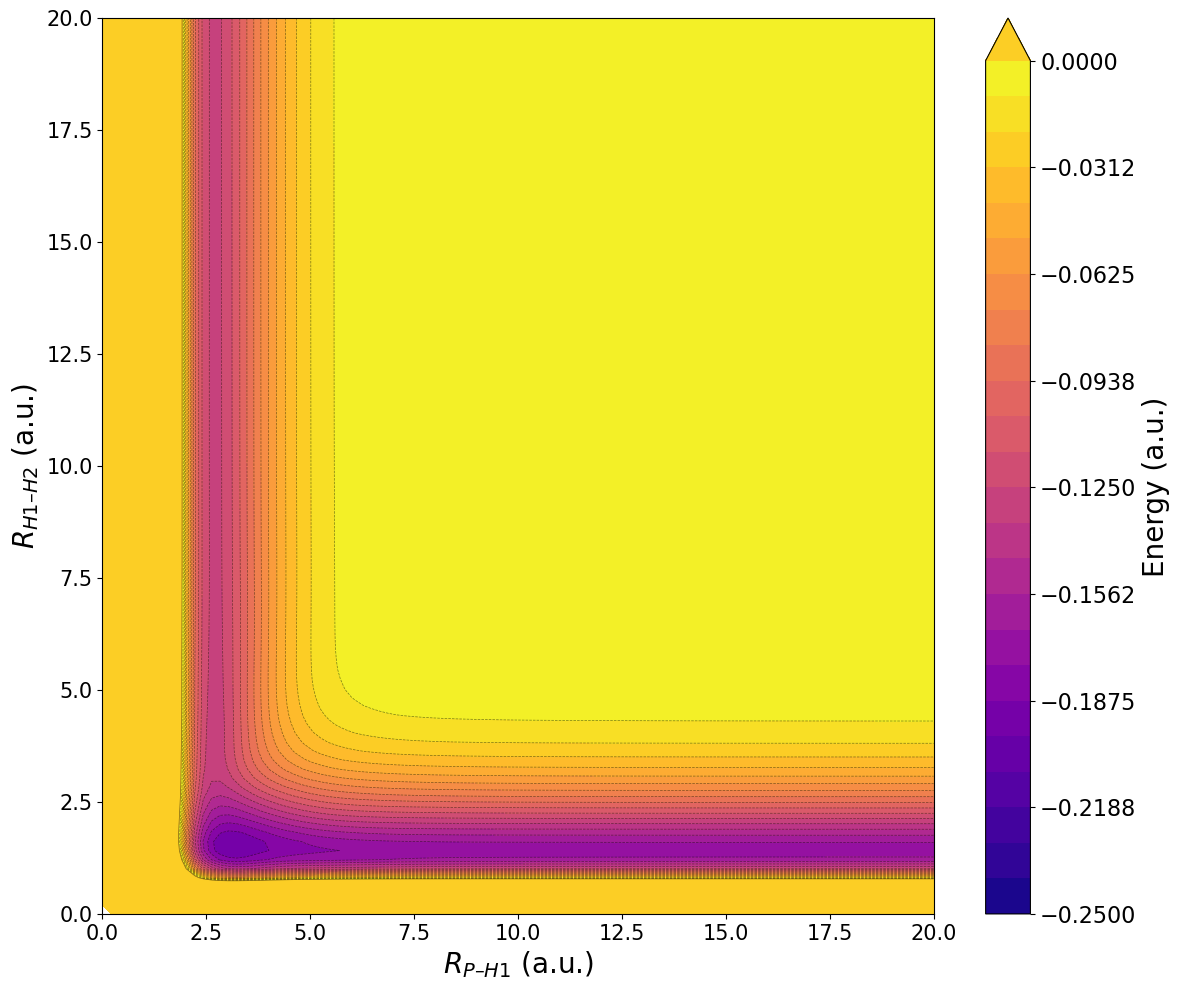

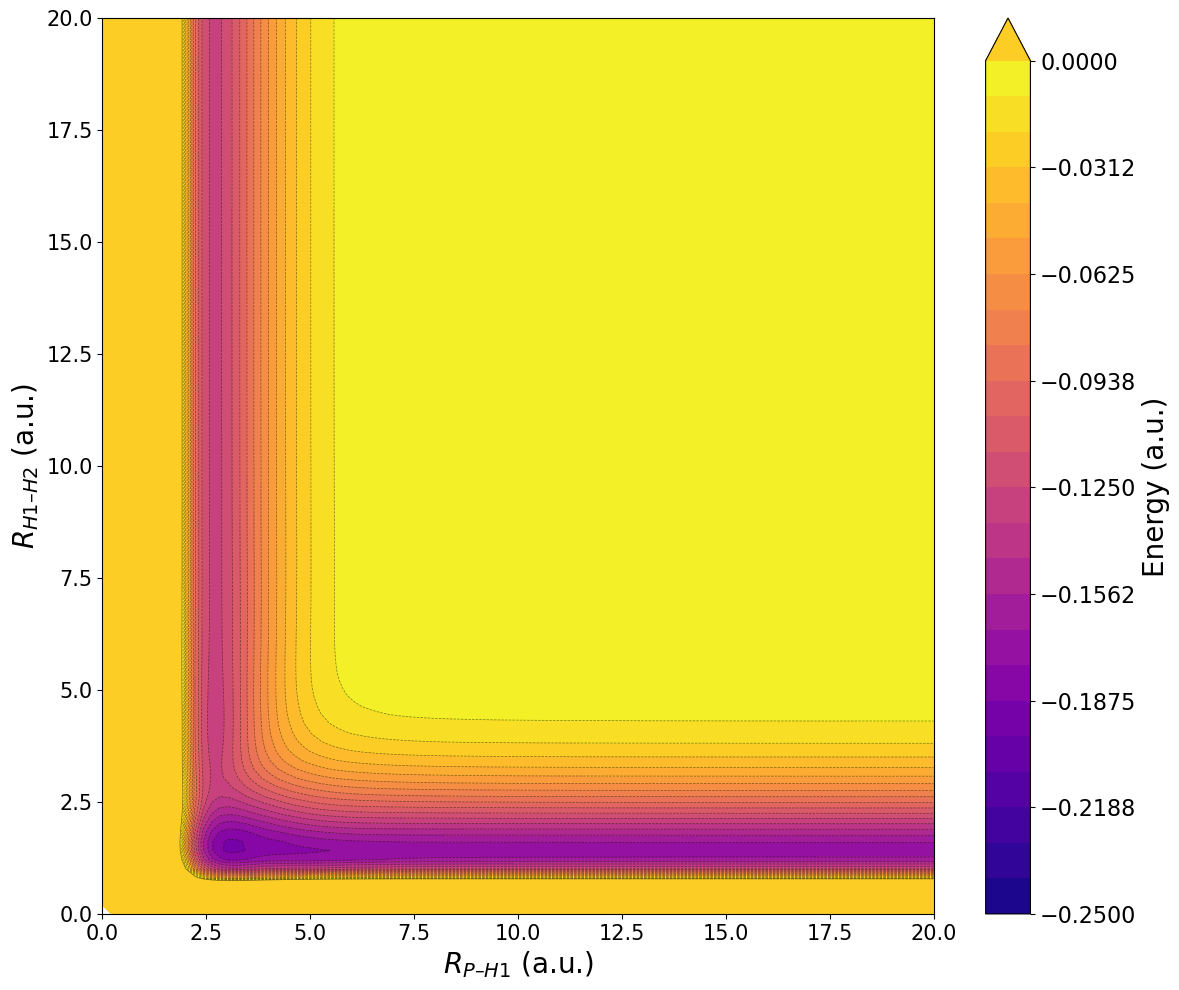

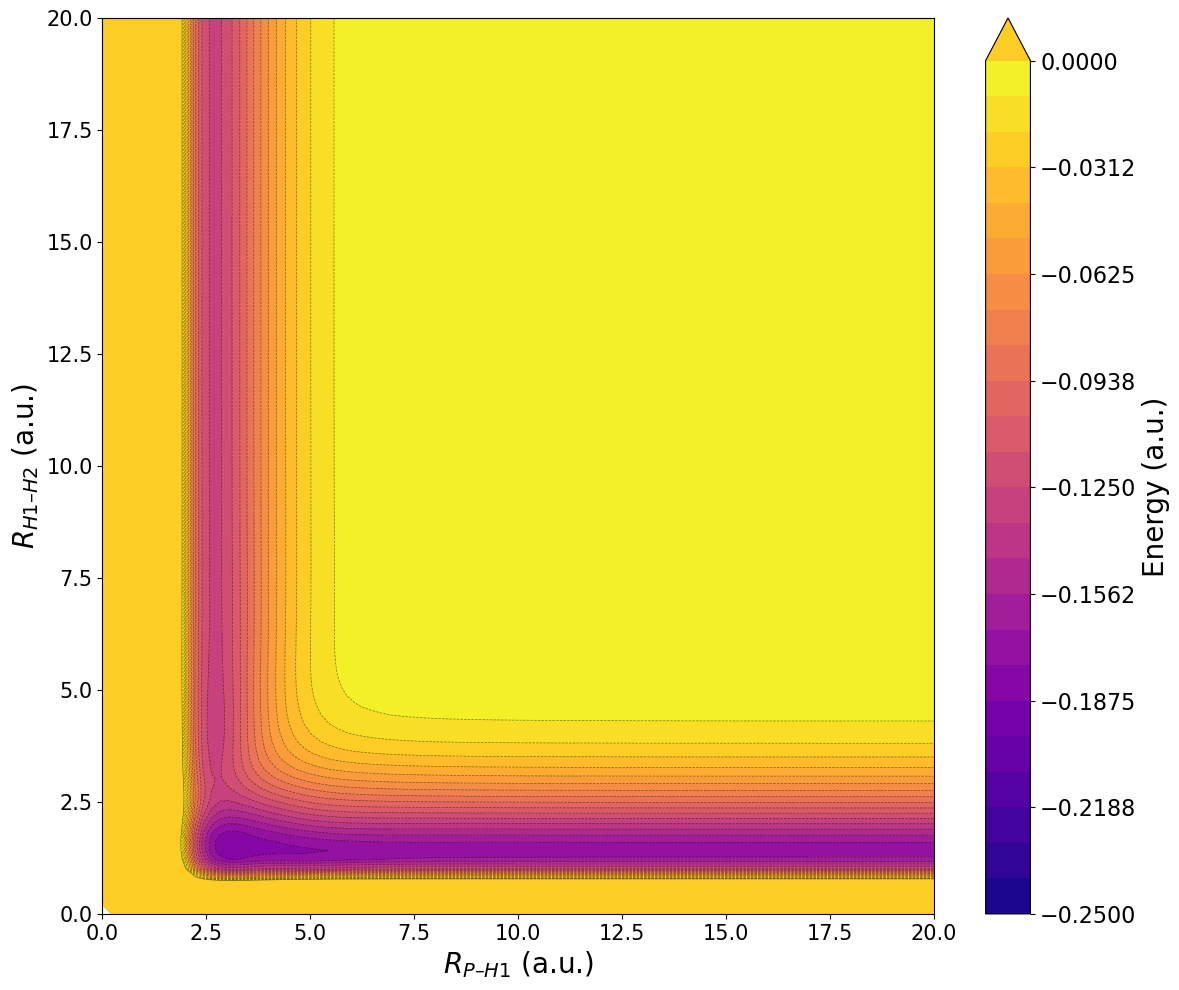

In [56]:
# Ejemplo de función analítica. Reemplaza con tu propia función.
def energia(r_PH1, r_PH2, r_HH):
    if (r_PH1 < 2.0):
        e12=4.70442*np.exp(-0.948769*r_PH1**2)-0.135445
    else:
        e12,d12=diatphm(r_PH1)
    if (r_PH2 < 2.0):
        e13=4.70442*np.exp(-0.948769*r_PH2**2)-0.135445
    else:
        e13,d13=diatphm(r_PH2)
    if (r_HH < 0.74):
        e23=1.33889*r_HH**2 - 2.92997*r_HH + 1.47035
    else:
        e23,d23=diathh(r_HH)

    e12,d12=diatphm(r_PH1)
    e13,d13=diatphm(r_PH2)
    e23,d23=diathh(r_HH)
    # print(r_PH2,e13)
    bod3,bodd3=fitGS.fit3d(r_PH1,r_PH2,r_HH)
    return bod3 + e12 + e13 + e23

def es_geometria_valida(r12, r13, r23):
    return (
        r12 + r13 > r23 and
        r12 + r23 > r13 and
        r13 + r23 > r12
    )

def get_ic(rg,rp,theta):
    thrad=np.radians(theta)
    r12=((rp*0.50)*(rp*0.50)+rg*rg-2.0*0.50*rp*rg*np.cos(thrad))**0.50
    r13=((rp*0.50)*(rp*0.50)+rg*rg-2.0*0.50*rp*rg*np.cos(np.pi-thrad))**0.50
    r23=rp
    return r12,r13,r23

def energia_con_angulo(r12, r23, theta_rad):
    r13_sq = r12**2 + r23**2 - 2 * r12 * r23 * np.cos(theta_rad)
    if r13_sq <= 0:
        return np.nan  # geometría inválida
    r13 = np.sqrt(r13_sq)
    return energia(r12, r13, r23)

angle = [0.00, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0]
angle = np.linspace(0,180,6)
angle = [0.0,30.0,60.0,90.0,120.0,150.0,180.0]

for ang in angle:
    # Malla
    r12_vals = np.linspace(0.0, 20.0, 100)
    r23_vals = np.linspace(0.0, 20.0, 100)
    R12, R23 = np.meshgrid(r12_vals, r23_vals)
    E = np.zeros_like(R12)
    theta_rad = np.radians(ang)


    # Calcular energía
    for i in range(R12.shape[0]):
        for j in range(R12.shape[1]):
            E[i, j] = energia_con_angulo(R12[i,j],R23[i,j],theta_rad)
            # if es_geometria_valida(R12[i,j],theta_rad,R23[i,j]):
                # E[i, j] = energia(R12[i, j], theta_rad, R23[i, j])

    # Colormap completo entre vmin y vmax
    vmin = -0.25
    vmax = 0.0
    levels = np.linspace(vmin, vmax, 25)  # 100 niveles hasta 0.0, sin más
    levels_cnt = np.linspace(vmin, vmax, 25)  # 100 niveles hasta 0.0, sin más

    # Colormap y norm
    cmap = plt.get_cmap('gnuplot').copy()
    cmap = plt.get_cmap('plasma').copy()
    cmap.set_over(cmap(0.9))  # color para energías > vmax (amarillo brillante)
    norm = Normalize(vmin=vmin, vmax=vmax, clip=False)

    # Graficar
    plt.figure(figsize=(12, 10))
    cp = plt.contourf(R12, R23, E, levels=levels, cmap=cmap, norm=norm, extend='max')
    plt.contour(R12, R23, E, levels=levels_cnt, colors='black', linewidths=0.5, ls=":",alpha=0.5)
    cbar=plt.colorbar(cp, label='Energy (u.a.)')
    plt.xlabel(r'$R_{P–H1}$ (a.u.)',fontsize=20)
    plt.ylabel(r'$R_{H1–H2}$ (a.u.)',fontsize=20)
    plt.tick_params(axis='both',labelsize=15)
    cbar.set_label('Energy (a.u.)', fontsize=20)  # texto del label
    cbar.ax.tick_params(labelsize=16)
    # plt.title(r"1 $^3$A'' (P–H2 fix at "+ str(ang) + " a.u.)")
    plt.tight_layout()
    plt.savefig("1TApp_"+str(ang)+".png", dpi=300,transparent=True)
    plt.show()
 

/tmp/ipykernel_1549506/239904399.py:77: UserWarning: The following kwargs were not used by contour: 'ls'
  plt.contour(R12, R23, E, levels=levels_cnt, colors='black', linewidths=0.5, ls=":",alpha=0.5)


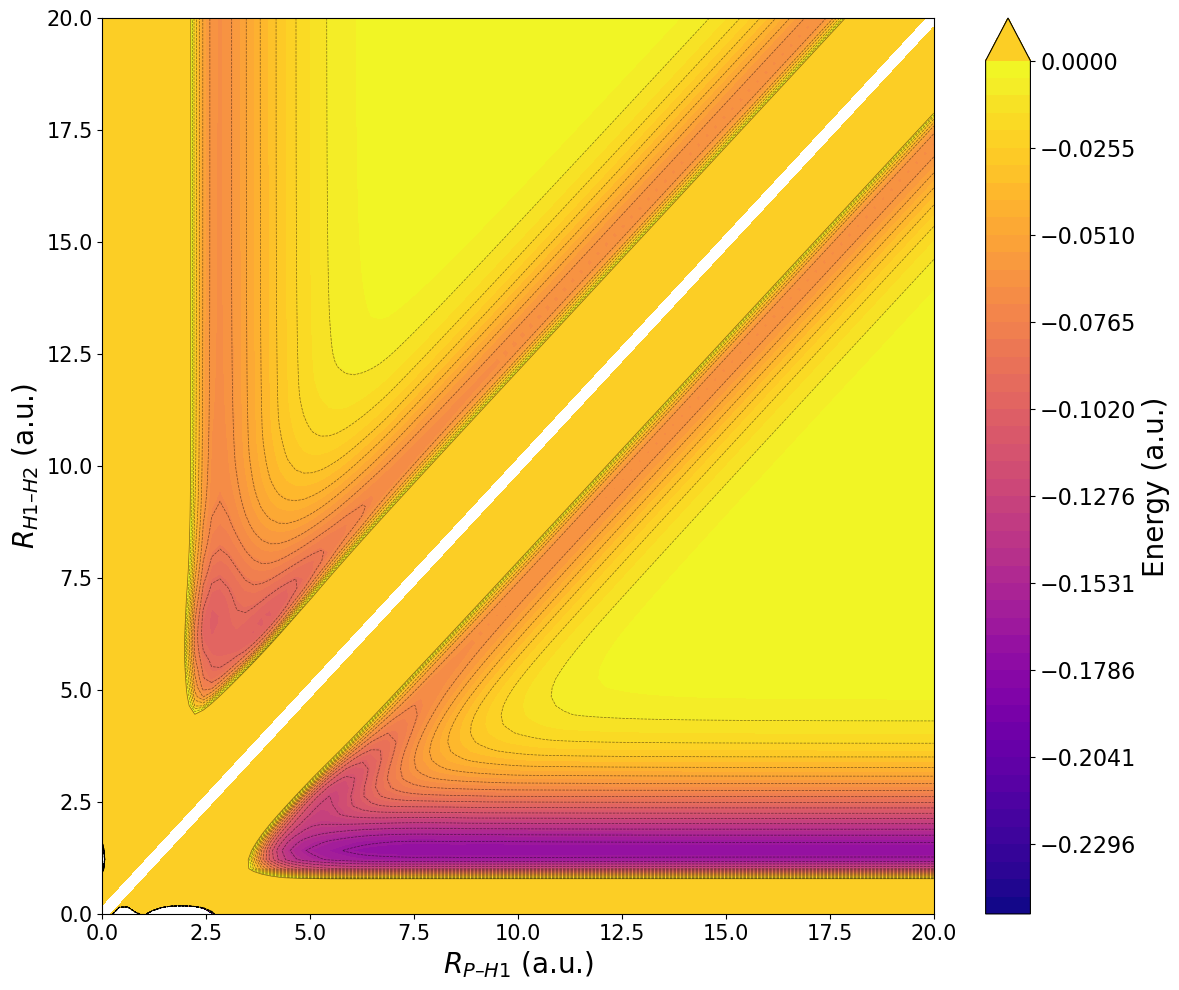

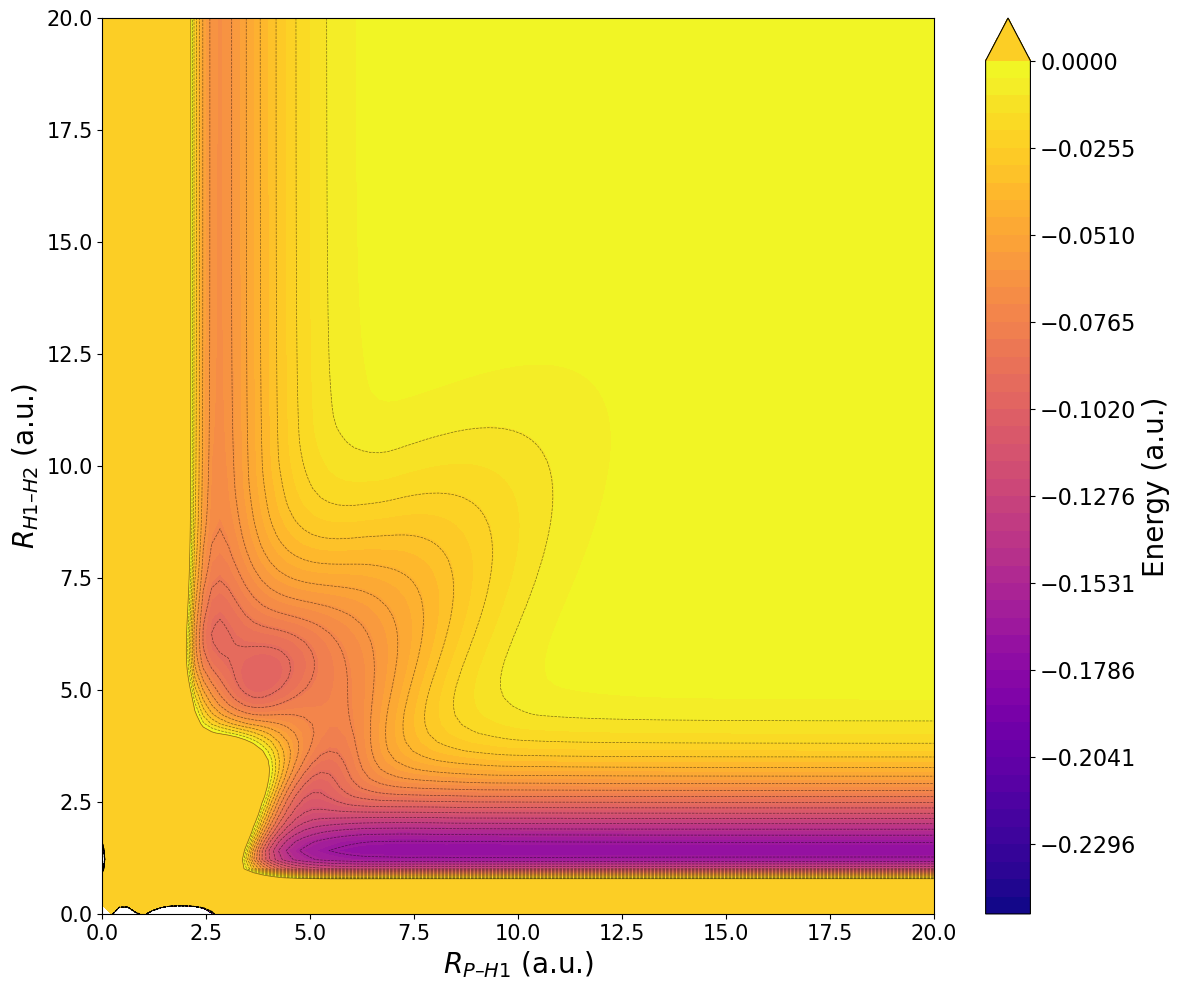

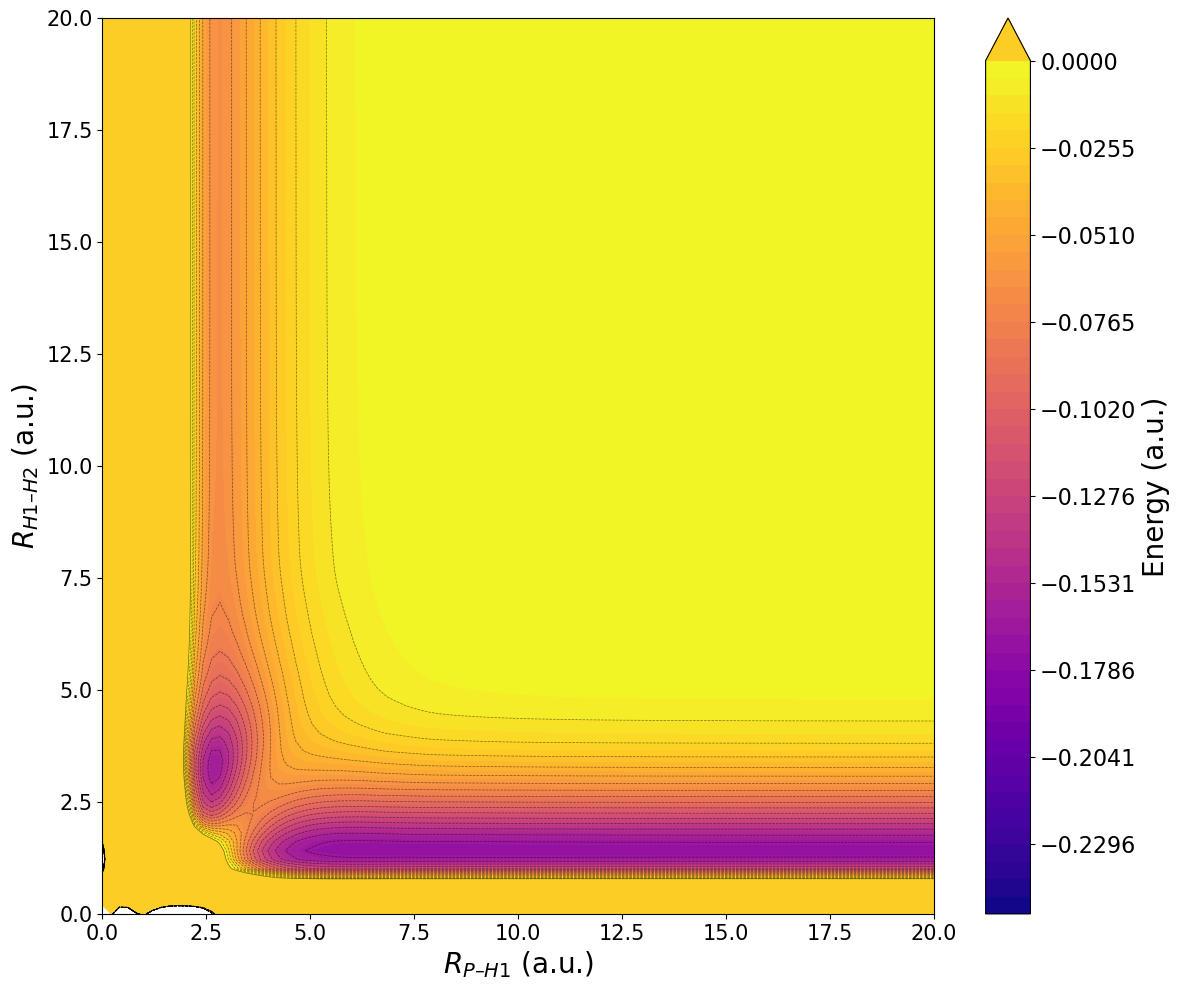

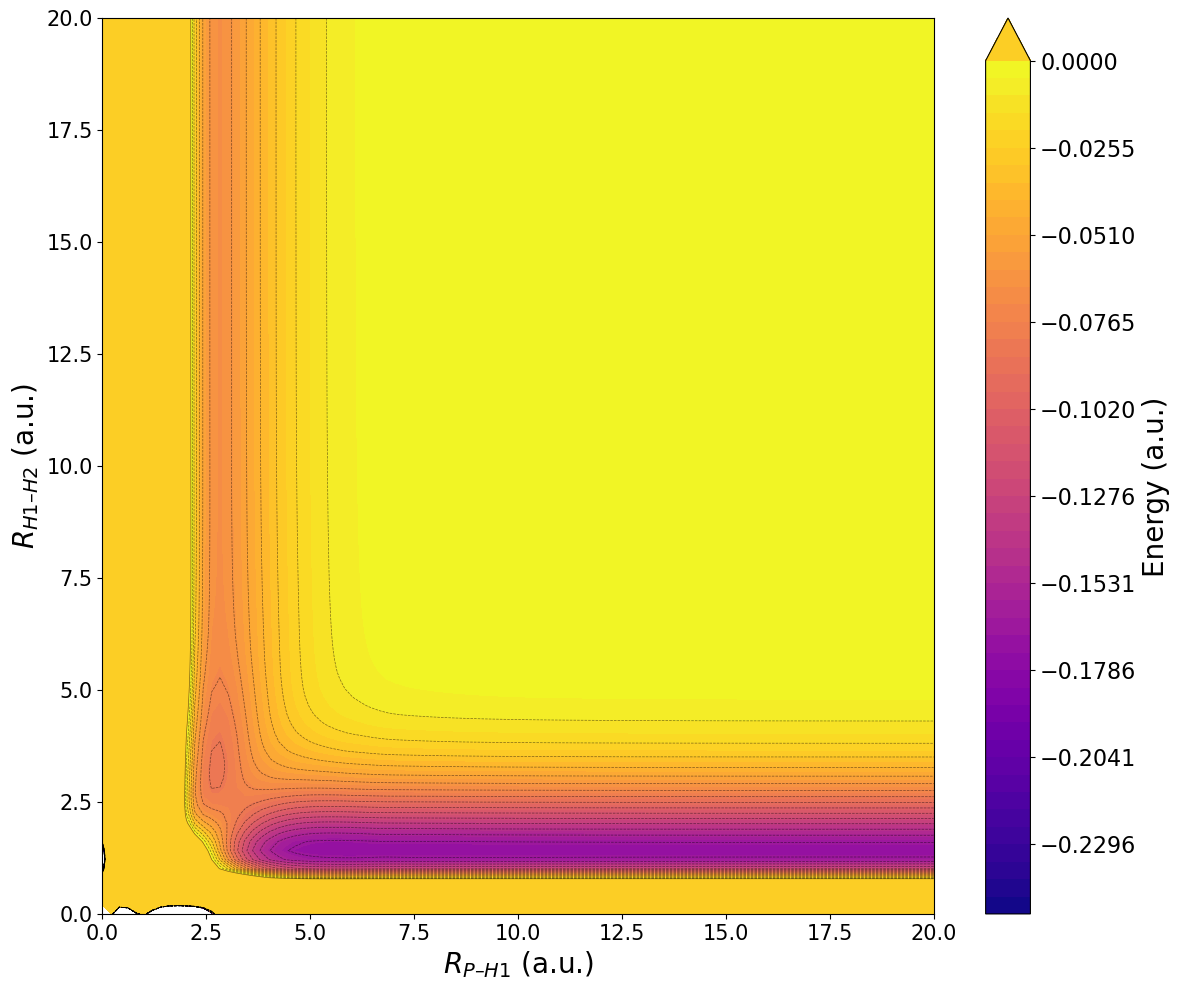

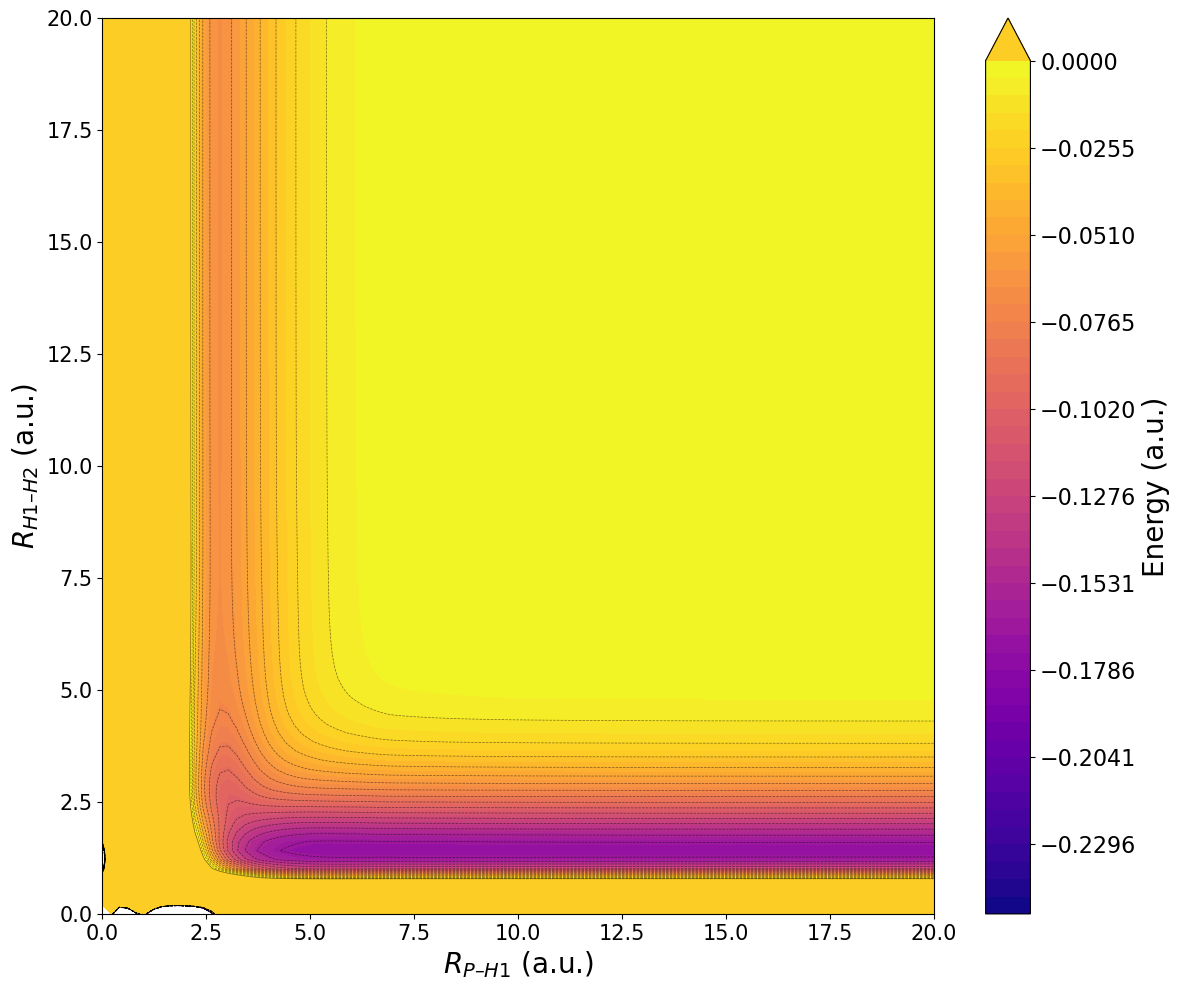

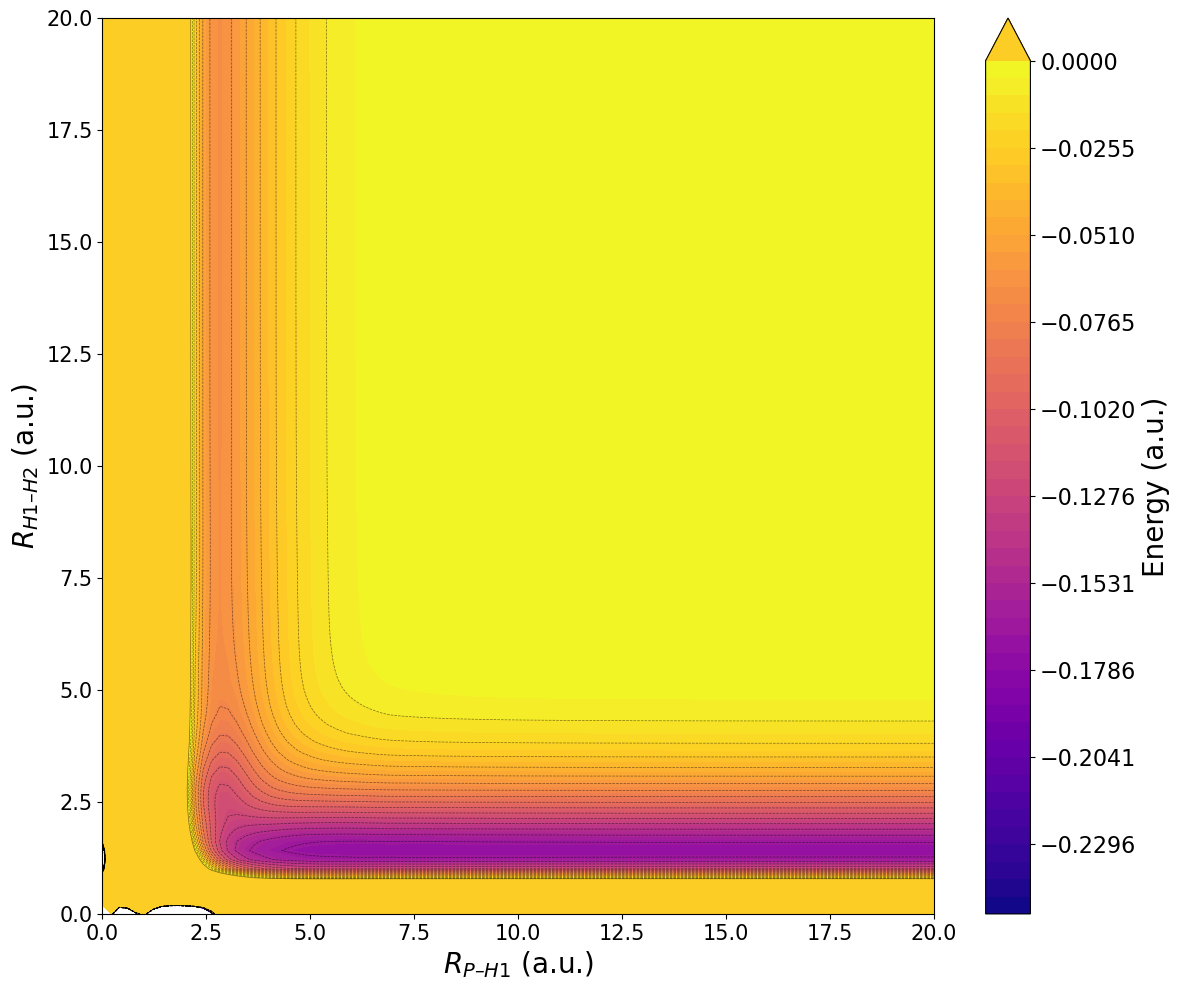

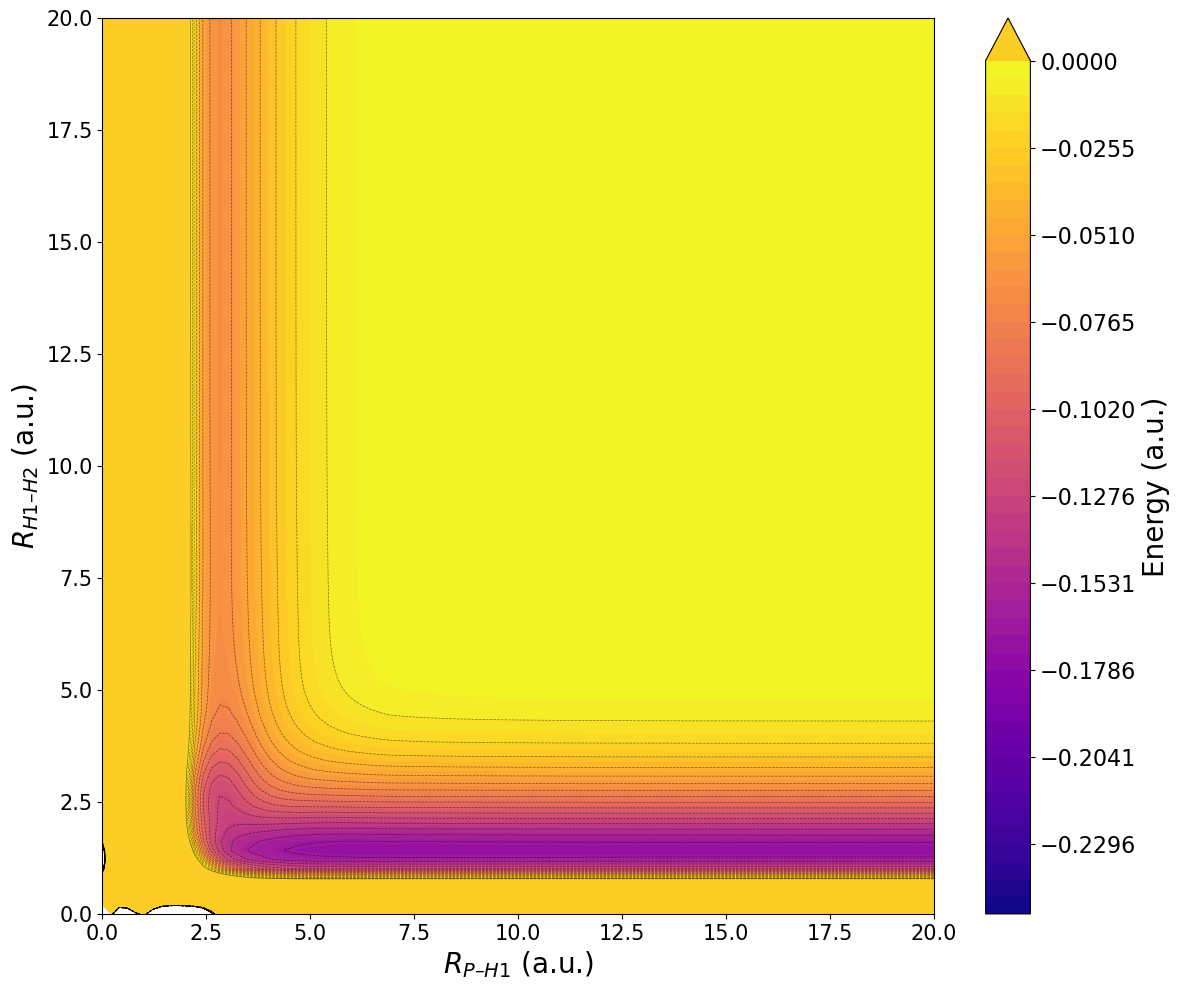

In [57]:
# Ejemplo de función analítica. Reemplaza con tu propia función.
def energia(r_PH1, r_PH2, r_HH):
    if r_PH1 < 2.0:
        e12 = 0.309099*r_PH1**2.0-1.57688*r_PH1+1.95195
    else:
        e12,d12 = diat1qsm(r_PH1)
    
    if r_PH2 < 2.0:
        e13 = 0.309099*r_PH2**2.0-1.57688*r_PH2+1.95195
    else:
        e13,d13 = diat1qsm(r_PH2)

    if r_HH < 0.74:
        e23 = 1.33889*r_HH**2.0-2.92997*r_HH+1.47035
    else:
        e23,d23 = diathh(r_HH)

    bod3,bodd3=fit1QSm.fit3d(r_PH1,r_PH2,r_HH)
    return bod3 + e12 + e13 + e23

def es_geometria_valida(r12, r13, r23):
    return (
        r12 + r13 > r23 and
        r12 + r23 > r13 and
        r13 + r23 > r12
    )

def get_ic(rg,rp,theta):
    thrad=np.radians(theta)
    r12=((rp*0.50)*(rp*0.50)+rg*rg-2.0*0.50*rp*rg*np.cos(thrad))**0.50
    r13=((rp*0.50)*(rp*0.50)+rg*rg-2.0*0.50*rp*rg*np.cos(np.pi-thrad))**0.50
    r23=rp
    return r12,r13,r23

def energia_con_angulo(r12, r23, theta_rad):
    r13_sq = r12**2 + r23**2 - 2 * r12 * r23 * np.cos(theta_rad)
    if r13_sq <= 0:
        return np.nan  # geometría inválida
    r13 = np.sqrt(r13_sq)
    return energia(r12, r13, r23)

angle = [0.00, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0]
angle = np.linspace(0,180,6)
angle = [0.0,30.0,60.0,90.0,120.0,150.0,180.0]

for ang in angle:
    # Malla
    r12_vals = np.linspace(0.0, 20.0, 100)
    r23_vals = np.linspace(0.0, 20.0, 100)
    R12, R23 = np.meshgrid(r12_vals, r23_vals)
    E = np.zeros_like(R12)
    theta_rad = np.radians(ang)


    # Calcular energía
    for i in range(R12.shape[0]):
        for j in range(R12.shape[1]):
            E[i, j] = energia_con_angulo(R12[i,j],R23[i,j],theta_rad)
            # if es_geometria_valida(R12[i,j],theta_rad,R23[i,j]):
                # E[i, j] = energia(R12[i, j], theta_rad, R23[i, j])

    # Colormap completo entre vmin y vmax
    vmin = -0.25
    vmax = 0.0
    levels = np.linspace(vmin, vmax, 50)  # 100 niveles hasta 0.0, sin más
    levels_cnt = np.linspace(vmin, vmax, 25)  # 100 niveles hasta 0.0, sin más

    # Colormap y norm
    cmap = plt.get_cmap('gnuplot').copy()
    cmap = plt.get_cmap('plasma').copy()
    cmap.set_over(cmap(0.9))  # color para energías > vmax (amarillo brillante)
    norm = Normalize(vmin=vmin, vmax=vmax, clip=False)

    # Graficar
    plt.figure(figsize=(12, 10))
    cp = plt.contourf(R12, R23, E, levels=levels, cmap=cmap, norm=norm, extend='max')
    plt.contour(R12, R23, E, levels=levels_cnt, colors='black', linewidths=0.5, ls=":",alpha=0.5)
    cbar=plt.colorbar(cp, label='Energy (u.a.)')
    plt.xlabel(r'$R_{P–H1}$ (a.u.)',fontsize=20)
    plt.ylabel(r'$R_{H1–H2}$ (a.u.)',fontsize=20)
    plt.tick_params(axis='both',labelsize=15)
    cbar.set_label('Energy (a.u.)', fontsize=20)  # texto del label
    cbar.ax.tick_params(labelsize=16)
    # plt.title(r"1 $^3$A'' (P–H2 fix at "+ str(ang) + " a.u.)")
    plt.tight_layout()
    plt.savefig("2TApp_"+str(ang)+".png", dpi=300,transparent=True)
    plt.show()
 